# Исследование объявлений о продаже квартир

Необходимо научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [296]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)
print(df.info())
df.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Вывод

распечатал первые 10, применил инфо. ДФ оказался какой то кашей, что бы это исправить я добавил sep='\t' в строку открытия дф, что бы разделить значения.


airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

balcony — число балконов

ceiling_height — высота потолков (м)

cityCenters_nearest — расстояние до центра города (м)

days_exposition — сколько дней было размещено объявление (от публикации до снятия)

first_day_exposition — дата публикации

floor — этаж

floors_total — всего этажей в доме

is_apartment — апартаменты (булев тип)

kitchen_area — площадь кухни в квадратных метрах (м²)

last_price — цена на момент снятия с публикации

living_area — жилая площадь в квадратных метрах(м²)

locality_name — название населённого пункта

open_plan — свободная планировка (булев тип)

parks_around3000 — число парков в радиусе 3 км

parks_nearest — расстояние до ближайшего парка (м)

ponds_around3000 — число водоёмов в радиусе 3 км

ponds_nearest — расстояние до ближайшего водоёма (м)

rooms — число комнат

studio — квартира-студия (булев тип)

total_area — площадь квартиры в квадратных метрах (м²)

total_images — число фотографий квартиры в объявлении


### Шаг 2. Предобработка данных

In [297]:
df.isnull().sum()
df['ceiling_height'].unique()      #посмотрел уникальные значения, основная масса 2-3 метра, если аномальные значения
df['ceiling_height'].describe() #средние значения и медиана примерна одинаковы, заполним пропуски по медиане.
df.loc[df['ceiling_height'].isnull() == True, 'ceiling_height'] = df['ceiling_height'].median()



посмотрел уникальные значения, основная масса 2-3 метра, если аномальные значения
  Cредние значения и медиана примерна одинаковы, заполнил пропуски по медиане.

In [298]:
df['balcony'] = df['balcony'].fillna(0)
df.loc[df['is_apartment'].isnull() == True, 'is_apartment'] = False
df['locality_name'] = df['locality_name'].fillna('Неизвестен')
df['floors_total'] = df['floors_total'].fillna(-1)

0 тк балконов скорее всего нет, и узнать наверняка из этих данных мы не можем

Пропуск в колонке аппартаменты скорее всего означает что жилье не является апартаментами
большенство даже не знают что это такое, поэтому не заполняли этот пункт

пропуски населенного пункта меняю на - Неизвестен

общее количество этажей выяснить невозможно, пропуски заполнил индикаторным значением -1





In [299]:
living_area_pivot = df.pivot_table(index = 'rooms', columns = ['is_apartment'], values='living_area', aggfunc ='median')
living_area_pivot.loc[1, False]
df.loc[(df['living_area'].isnull() == True) & (df['rooms'] == 0), 'living_area'] = living_area_pivot.loc[0, False]
df.loc[(df['living_area'].isnull() == True) & (df['rooms'] == 1), 'living_area'] = living_area_pivot.loc[1, False]
df.loc[(df['living_area'].isnull() == True) & (df['rooms'] == 2), 'living_area'] = living_area_pivot.loc[2, False]
df.loc[(df['living_area'].isnull() == True) & (df['rooms'] == 3), 'living_area'] = living_area_pivot.loc[3, False]
df.loc[(df['living_area'].isnull() == True) & (df['rooms'] == 4), 'living_area'] = living_area_pivot.loc[4, False]
df.loc[(df['living_area'].isnull() == True) & (df['rooms'] == 5), 'living_area'] = living_area_pivot.loc[5, False]
df.loc[(df['living_area'].isnull() == True) & (df['rooms'] == 6), 'living_area'] = living_area_pivot.loc[6, False]
df.loc[(df['living_area'].isnull() == True) & (df['rooms'] == 7), 'living_area'] = living_area_pivot.loc[7, False]
df.loc[(df['living_area'].isnull() == True) & (df['rooms'] == 9), 'living_area'] = living_area_pivot.loc[9, False]

для заполнения пропусков жилой площади я составил сводную таблицу, где индексы - количество комнат, в качестве колонки взял
аппартаменты, тк большенство значений там false с ним удобно находит нужные мне ячейки
значения медиан в зависимости от количества комнат я подставил в аналогичные пропуски в ДФ

In [300]:
kitchen_area_pivot = df.pivot_table(index = 'rooms', columns = ['is_apartment'], values='kitchen_area', aggfunc ='median')
kitchen_area_pivot
df.loc[(df['kitchen_area'].isnull() == True) & (df['rooms'] == 0), 'kitchen_area'] = 0
df.loc[(df['kitchen_area'].isnull() == True) & (df['rooms'] == 1), 'kitchen_area'] = kitchen_area_pivot.loc[1, False]
df.loc[(df['kitchen_area'].isnull() == True) & (df['rooms'] == 2), 'kitchen_area'] = kitchen_area_pivot.loc[2, False]
df.loc[(df['kitchen_area'].isnull() == True) & (df['rooms'] == 3), 'kitchen_area'] = kitchen_area_pivot.loc[3, False]
df.loc[(df['kitchen_area'].isnull() == True) & (df['rooms'] == 4), 'kitchen_area'] = kitchen_area_pivot.loc[4, False]
df.loc[(df['kitchen_area'].isnull() == True) & (df['rooms'] == 5), 'kitchen_area'] = kitchen_area_pivot.loc[5, False]
df.loc[(df['kitchen_area'].isnull() == True) & (df['rooms'] == 6), 'kitchen_area'] = kitchen_area_pivot.loc[6, False]
df.loc[(df['kitchen_area'].isnull() == True) & (df['rooms'] == 7), 'kitchen_area'] = kitchen_area_pivot.loc[7, False]
df.loc[(df['kitchen_area'].isnull() == True) & (df['rooms'] == 8), 'kitchen_area'] = kitchen_area_pivot.loc[8, False]
df.loc[(df['kitchen_area'].isnull() == True) & (df['rooms'] == 9), 'kitchen_area'] = kitchen_area_pivot.loc[9, False]

аналогично предыдущему пункту я поступил с площадью кухни, с одним исключением, для квартир с значением комнат =0
я поставил площадь кухни =0 тк квартиры без комнат это студии, и там нет отдельно кухни


In [301]:
df.loc[(df['parks_around3000'].isnull() == True) , 'parks_around3000'] = 0
df.loc[(df['ponds_around3000'].isnull() == True) , 'ponds_around3000'] = 0
df.loc[(df['parks_nearest'].isnull() == True) & (df['parks_around3000'] == 0.0), 'parks_nearest'] = 0
df.loc[(df['ponds_nearest'].isnull() == True) & (df['ponds_around3000'] == 0.0), 'ponds_nearest'] = 0

не указанное количество парков и водоемов поблизости я прировнял к 0, там где указано количесвто в районе 3000м указано и 
расстояние до ближайших, где нет, скорее всего они отсутсвуют.

In [302]:
df['days_exposition'].describe()

days_exposition_pivot = df.pivot_table(index = 'rooms', columns = ['is_apartment'], values='days_exposition', aggfunc ='median')
df.loc[(df['days_exposition'].isnull() == True) & (df['rooms'] == 0), 'days_exposition'] = days_exposition_pivot.loc[0, False]
df.loc[(df['days_exposition'].isnull() == True) & (df['rooms'] == 1), 'days_exposition'] = days_exposition_pivot.loc[1, False]
df.loc[(df['days_exposition'].isnull() == True) & (df['rooms'] == 2), 'days_exposition'] = days_exposition_pivot.loc[2, False]
df.loc[(df['days_exposition'].isnull() == True) & (df['rooms'] == 3), 'days_exposition'] = days_exposition_pivot.loc[3, False]
df.loc[(df['days_exposition'].isnull() == True) & (df['rooms'] == 4), 'days_exposition'] = days_exposition_pivot.loc[4, False]
df.loc[(df['days_exposition'].isnull() == True) & (df['rooms'] == 5), 'days_exposition'] = days_exposition_pivot.loc[5, False]
df.loc[(df['days_exposition'].isnull() == True) & (df['rooms'] == 6), 'days_exposition'] = days_exposition_pivot.loc[6, False]
df.loc[(df['days_exposition'].isnull() == True) & (df['rooms'] == 7), 'days_exposition'] = days_exposition_pivot.loc[7, False]
df.loc[(df['days_exposition'].isnull() == True) & (df['rooms'] == 8), 'days_exposition'] = days_exposition_pivot.loc[8, False]
df.loc[(df['days_exposition'].isnull() == True) & (df['rooms'] == 9), 'days_exposition'] = days_exposition_pivot.loc[9, False]
df.loc[(df['days_exposition'].isnull() == True) & (df['rooms'] == 10), 'days_exposition'] = days_exposition_pivot.loc[10, False]
df.loc[(df['days_exposition'].isnull() == True) & (df['rooms'] == 11), 'days_exposition'] = days_exposition_pivot.loc[11, False]


пропущенные значения времени нахождения обьявления заполнил по медиане, в зависимости от количества комнат в квартире

In [303]:
for i in df['locality_name'].unique():
    filtred_isna = df['cityCenters_nearest'].isna() & (df['locality_name'] == i)
    filtred = (df['locality_name'] == i)
    len_filtred = len(df.loc[filtred, 'cityCenters_nearest'])
    len_filtred_isna = len(df.loc[filtred_isna, 'cityCenters_nearest'])
    if len_filtred > len_filtred_isna & len_filtred_isna !=0:
        df.loc[filtred_isna, 'cityCenters_nearest'] = df.loc[df['locality_name'] == i, 'cityCenters_nearest'].median()
        
for t in df['locality_name'].unique():
    filtred_isna = df['airports_nearest'].isna() & (df['locality_name'] == t)
    filtred = (df['locality_name'] == t)
    len_filtred = len(df.loc[filtred, 'airports_nearest'])
    len_filtred_isna = len(df.loc[filtred_isna, 'airports_nearest'])
    if len_filtred > len_filtred_isna & len_filtred_isna !=0:
        df.loc[filtred_isna, 'airports_nearest'] = df.loc[df['locality_name'] == t, 'airports_nearest'].median()  
        
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(0)  
df['airports_nearest'] = df['airports_nearest'].fillna(0)

расстояние до аэропорта и цента я попытался заполнить по медиане оносительно населенного пункта, однако
большенство пропусков остаются, заполнил их 0

In [304]:

df.isnull().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

Пропусков не осталось, согласно коментарию разбил код на более мелкие ячейки.

In [305]:
## Изменение типов данных:
# last_price - цена, дроби не нужны
# floors_total - количество этажей может быть только целым
# balcony количество - балконов может быть только целым
# airports_nearest -
# cityCenters_nearest - 
# parks_around3000 -
# parks_nearest     -      все расстояние целые значения
# ponds_around3000 -
#ponds_nearest -
#days_exposition - дни не могут быть дробными
df['last_price'] = df['last_price'].astype(int)
df['floors_total'] = df['floors_total'].astype(int)
df['balcony'] = df['balcony'].astype(int)
df['airports_nearest'] = df['airports_nearest'].astype(int)
df['cityCenters_nearest'] = df['cityCenters_nearest'].astype(int)
df['parks_around3000'] = df['parks_around3000'].astype(int)
df['parks_nearest'] = df['parks_nearest'].astype(int)
df['ponds_around3000'] = df['ponds_around3000'].astype(int)
df['ponds_nearest'] = df['ponds_nearest'].astype(int)
df['days_exposition'] = df['days_exposition'].astype(int)

df.head(10)
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23699 non-null object
airports_nearest        23699 non-null int64
cityCenters_nearest     23699 non-null int64
parks_around3000        23699 non-null int64
parks_nearest           23699 non-null int64
ponds_around3000        23699

### Шаг 3. Посчитайте и добавьте в таблицу

In [306]:
df['per_meter'] = df['last_price'] / df['total_area']  #делим цену кв на общ блощадь, получаем цену за метр
df['per_meter'] = df['per_meter'].astype(int)  # новой клонке даем целостный тип

def floor_type(row):
    total_f = row['floors_total']
    floor = row['floor']
    try:
        if floor == 1:
            return('Первый этаж')
        if floor == total_f:
            return('Последний этаж')
        return('Другой этаж')
    except:
        print('err')

df['floor_type'] = df.apply(floor_type, axis=1)

df['living_area_ratio(%)'] = ((df['living_area'] / df['total_area'])*100).astype('int') 
df['kitchen_area_ratio(%)'] = ((df['kitchen_area'] / df['total_area'])*100).astype('int') 
# оношение жилой и кухонной площади к общей, добавил эти 2 столба в дф

df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])
df['day of week'] = df['first_day_exposition'].apply(lambda time: time.dayofweek)
df['month'] = df['first_day_exposition'].apply(lambda time: time.month)
df['year'] = df['first_day_exposition'].apply(lambda t: t.year)
df.head(10)
df['floor_type'].value_counts()
# получил колонки дня недели(где 0-воскресенье, 7 суббота) месяца и года 


Другой этаж       17446
Последний этаж     3336
Первый этаж        2917
Name: floor_type, dtype: int64

Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. 

Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

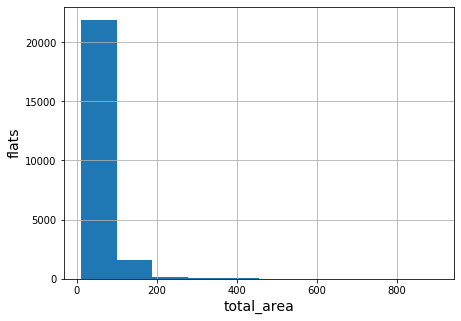

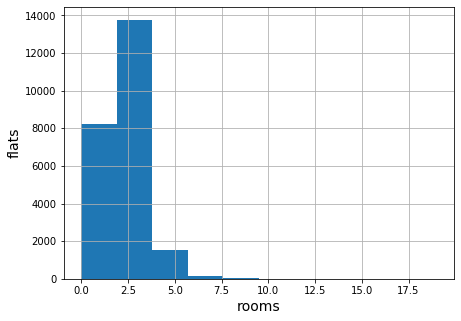

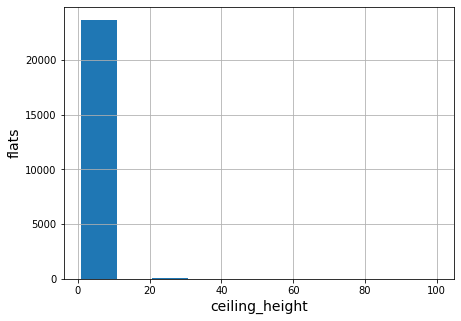

In [307]:
columns = ['total_area', 'rooms', 'ceiling_height']
for i in columns:
    df[i].hist(figsize = (7,5))
    plt.xlabel(i, fontsize = 14)
    plt.ylabel('flats', fontsize = 14)
    plt.show()

#print(df['total_area'].hist(bins = 400, range= (0,430)))
#plt.show()
#df['last_price'].hist(bins = 100)
#print(df['rooms'].hist(bins = 15, range=(0, 15)))
#plt.show()

#print(df['ceiling_height'].hist(bins = 15, range=(2, 5)))
#plt.show()




AxesSubplot(0.125,0.125;0.775x0.755)


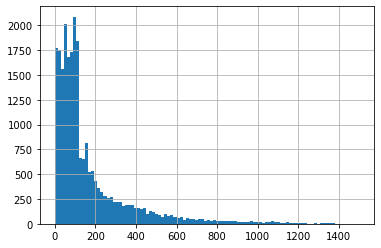

count    23699.000000
mean       170.694460
std        206.407849
min          1.000000
25%         45.000000
50%         92.000000
75%        200.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [308]:
print(df['days_exposition'].hist(bins = 100, range=(0, 1500)))
plt.show()
df['days_exposition'].describe()




Большая часть квартир продается быстрее 92 дней, однако средний показатель почти в 2 раза выше медианы, 
Это говорит о том что значительная часть квартир имеет очень долгий срок продажи
Мне кажется что быстрые продажи будут у нас меньше первых 25%, тоесть все что продалось быстрее 45 дней.

Долгая продажа, как мне кажется - выше среднего показателя, который практически совпадает с 75% от общего кол-ва 200 дней +

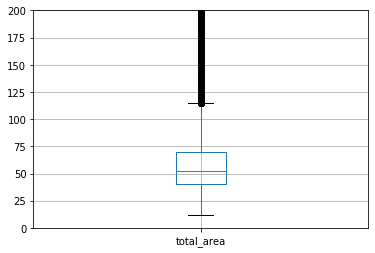

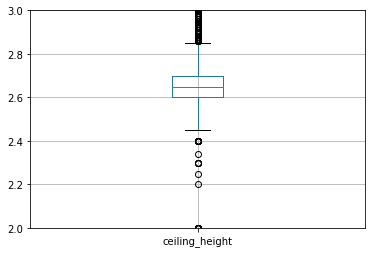

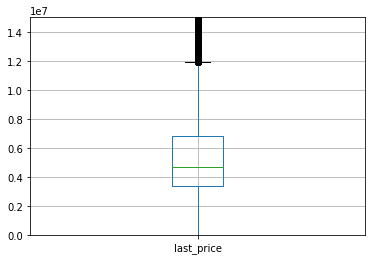

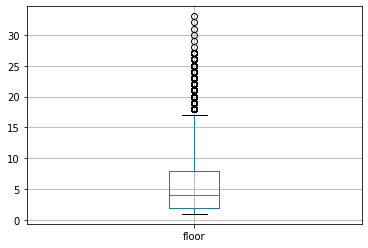

In [309]:
plt.ylim(0, 200)
df.boxplot(['total_area'])
plt.show()
plt.ylim(2, 3)
df.boxplot(['ceiling_height'])
plt.show()
plt.ylim(0, 15000000)
df.boxplot(['last_price'])
plt.show()
df.boxplot(['floor'])   
plt.show()

Составил boxplot для каждого необходимого столба.

In [310]:
df['good_height'] = (2.45 <= df['ceiling_height']) & (df['ceiling_height'] <= 2.85)
df.drop(df[df['good_height'] == False].index, inplace=True)
df['good_area'] = (13 <= df['total_area'])&(df['total_area'] <= 113)
df.drop(df[df['good_area'] == False].index, inplace=True)
df['good_price'] = (500000 <= df['last_price'])&(df['last_price'] <= 11900000)
df.drop(df[df['good_price'] == False].index, inplace=True)
df['good_floor'] = (1 <= df['floor'])&(df['floor'] <= 17)
df.drop(df[df['good_floor'] == False].index, inplace=True)


используя булл массивы я удалил строки не подходящие по условию

#Какие факторы больше всего влияют на стоимость квартиры? 
#Изучите, зависит ли цена от квадратного метра, числа комнат, удалённости от центра.
#Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.
#Также изучите зависимость от даты размещения: дня недели, месяца и года.

In [311]:
df.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,per_meter,living_area_ratio(%),kitchen_area_ratio(%),day of week,month,year,good_height,good_area,good_price,good_floor
total_images,1.000000,0.163703,0.108084,0.083570,-0.015511,0.020010,0.090117,0.040042,0.010187,-0.025645,-0.019381,0.053504,0.048137,0.036656,0.012416,0.012120,0.016615,-0.007717,-0.006075,-0.044254,0.116228,0.002905,-0.046870,-0.007906,0.002770,0.146301,NaN,NaN,NaN,NaN
last_price,0.163703,1.000000,0.676082,0.409408,0.239820,0.293170,0.513626,0.199061,0.006900,-0.068633,-0.047457,0.459276,0.099687,0.355932,0.155719,0.207103,0.218755,0.262624,0.209797,0.042589,0.636644,-0.047474,-0.119404,-0.011803,0.007890,0.005798,NaN,NaN,NaN,NaN
total_area,0.108084,0.676082,1.000000,0.800451,0.129419,0.035258,0.891918,0.005443,0.004532,-0.119261,-0.072525,0.415030,0.090207,0.054618,0.004978,0.019130,0.037940,0.078662,0.050790,0.087077,-0.094458,0.202813,-0.419645,-0.005800,0.012863,-0.059874,NaN,NaN,NaN,NaN
rooms,0.083570,0.409408,0.800451,1.000000,-0.102276,-0.199144,0.906033,-0.147491,-0.005895,-0.171204,-0.105953,0.061859,0.024412,0.011237,0.007726,0.022203,0.012310,0.007870,0.011838,0.064221,-0.246459,0.565701,-0.584463,-0.000997,0.000222,-0.030872,NaN,NaN,NaN,NaN
ceiling_height,-0.015511,0.239820,0.129419,-0.102276,1.000000,0.310044,-0.013031,0.184385,0.014052,0.049332,0.021878,0.327787,0.066366,-0.006048,-0.057502,-0.005414,0.007116,0.066388,0.024100,0.011936,0.193614,-0.251812,0.216463,0.006357,0.010640,-0.101814,NaN,NaN,NaN,NaN
floors_total,0.020010,0.293170,0.035258,-0.199144,0.310044,1.000000,-0.131197,0.576064,-0.002866,0.077530,0.045773,0.328410,0.145962,0.178610,0.059985,-0.093467,-0.028881,0.014812,0.059639,-0.027174,0.388501,-0.354290,0.308921,0.005167,0.009214,0.009821,NaN,NaN,NaN,NaN
living_area,0.090117,0.513626,0.891918,0.906033,-0.013031,-0.131197,1.000000,-0.103341,-0.006158,-0.075594,-0.044653,0.124445,0.051007,0.019873,0.000963,0.029958,0.021316,0.038916,0.028678,0.069041,-0.199128,0.602784,-0.600630,-0.001725,0.003604,-0.044823,NaN,NaN,NaN,NaN
floor,0.040042,0.199061,0.005443,-0.147491,0.184385,0.576064,-0.103341,1.000000,-0.006583,0.044767,0.019852,0.206031,0.153142,0.114505,0.037735,-0.050564,-0.008491,0.016916,0.053057,-0.034004,0.282088,-0.241983,0.209135,0.001076,0.017066,0.014590,NaN,NaN,NaN,NaN
is_apartment,0.010187,0.006900,0.004532,-0.005895,0.014052,-0.002866,-0.006158,-0.006583,1.000000,-0.002179,-0.001392,0.011651,0.013466,0.012895,0.011163,0.000431,-0.011195,0.001729,0.001498,-0.001732,0.007222,-0.011421,0.010396,-0.004028,0.000476,0.005900,NaN,NaN,NaN,NaN
studio,-0.025645,-0.068633,-0.119261,-0.171204,0.049332,0.077530,-0.075594,0.044767,-0.002179,1.000000,-0.004363,-0.200732,0.034712,-0.026763,-0.020409,-0.032024,-0.025616,-0.005643,-0.004438,-0.017993,0.046312,0.089714,-0.180096,-0.000336,0.000817,0.009417,NaN,NaN,NaN,NaN


Составил  таблицу корреляции датафрейма,  больше всего цена зависит от площади квартиры - 0,62

От количества комнат уже меньше, но зависимость так же есть  - 0,41

Странно, но исходя из нашей таблицы влияние удаленности от центра минимальное 0,1 

In [312]:
print(df['last_price'].corr(df['floor_type'] == 'Первый этаж'))
print(df['last_price'].corr(df['floor_type'] == 'Последний этаж'))
print(df['last_price'].corr(df['floor_type'] == 'Другой этаж'))
#этаж квартиры практически не влияет на ее стоимость
print(df['last_price'].corr(df['month']))
print(df['last_price'].corr(df['year']))
print(df['last_price'].corr(df['day of week']))
#опять же год, месяц, день, не влияют на стоимость


-0.13676095782152595
-0.09982117041020606
0.18142545943363994
0.00788954680750929
0.0057976136805601985
-0.01180335741044668


этаж квартиры практически не влияет на ее стоимость

месяц, день, не влияют на стоимость

#Выберите 10 населённых пунктов с наибольшим числом объявлений.
#Посчитайте среднюю цену квадратного метра в этих населённых пунктах. 
#Выделите населённые пункты с самой высокой и низкой стоимостью жилья. 
#Эти данные можно найти по имени в столбце 'locality_name'.

                   counts           mean
locality_name                           
Санкт-Петербург     11535  104302.385436
Пушкин                300   99697.276667
деревня Кудрово       258   93031.011628
посёлок Парголово     237   88845.147679
посёлок Мурино        441   85353.870748
посёлок Шушары        394   78340.040609
Колпино               313   75447.166134
Гатчина               283   68340.402827
Всеволожск            379   67063.343008
Выборг                205   57680.029268


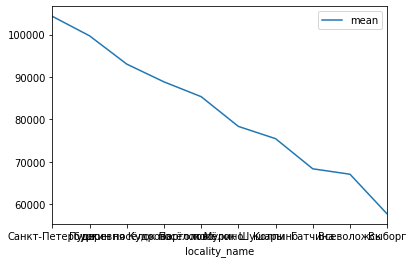

In [313]:
df['locality_name'].value_counts().head(10)
#Санкт-Петербург      15602
#посёлок Мурино         518
#посёлок Шушары         439
#Всеволожск             397
#Пушкин                 369
#Колпино                338
#посёлок Парголово      327
#Гатчина                306
#деревня Кудрово        299
#Выборг                 235
city_10 = df.pivot_table(index = 'locality_name', values = 'per_meter', aggfunc = ['count','mean'])
city_10.columns = ['counts', 'mean']
top_10_ct = city_10.sort_values(by = ('counts'), ascending = False).head(10)
top_10_ct_sort = top_10_ct.sort_values(by = ('mean'), ascending = False).head(10)
print(top_10_ct_sort)
top_10_ct_sort.plot(y='mean' )



#Как и ожидалось самая дорогая недвижимость оказалась в СПБ при подавляющем количестве обьявлений
#Самая же дешевая оказалась в Выборге, почти в 2 раза дешевле Питера на кв.м

составил график, но не получилось убрать наезд названий городов друг на друга..

#Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. 
#Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. 
#Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. 
#После этого посчитайте среднюю цену для каждого километра. 
#Постройте график: он должен показывать, как цена зависит от удалённости от центра. 
#Определите границу, где график сильно меняется — это и будет центральная зона.

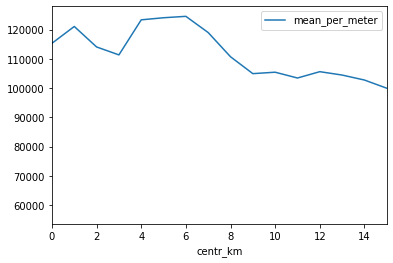

In [314]:
spb_centr = df.loc[df['locality_name'] == 'Санкт-Петербург']
spb_centr = pd.DataFrame(spb_centr)
spb_centr['centr_km'] = spb_centr['cityCenters_nearest'] / 1000
spb_centr['centr_km'] = spb_centr['centr_km'].astype(int)
spb_centr_sort = spb_centr.sort_values(by = ('centr_km'))

#spb_centr_sort.plot(y='per_meter',x='centr_km',)
centr_pivot = spb_centr_sort.pivot_table(index = 'centr_km', values = 'per_meter', aggfunc = ['mean'])
centr_pivot.columns = ['mean_per_meter']
centr_pivot.plot(y='mean_per_meter', xlim=(0, 15))
plt.show()



На графике видно несколько пиков, первый с 0 до 3 км который и есть наш центр, дажее идет небольшой подьем, 
как я считаю за счет новостроек бизнес и премиум класса, которые в центре строить нельзя.
после 9км уже начинаются районы, граничащие с КАД, цена проседает еще

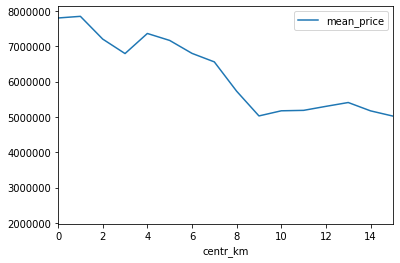

In [315]:
centr_price_pivot = spb_centr_sort.pivot_table(index = 'centr_km', values = 'last_price', aggfunc = ['mean'])
centr_price_pivot.columns = ['mean_price']
centr_price_pivot.plot(y= 'mean_price', xlim=(0, 15))


график по сдерней цене подтверждает мой вариант с центром в 3 км и бизнес недвижимостью 4-5км

#Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: 
#площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры 
#(число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. 
#Отличаются ли они от общих выводов по всему городу?

In [316]:
centre = spb_centr.query('centr_km <= 3')
print('Средняя площадь кв в центре: ', centre['total_area'].mean())
print('Количество комнат в центре: ', centre['rooms'].value_counts())
print('Средняя высота потолков в центре: ',centre['ceiling_height'].mean())
print('Средняя цена в центре: ', centre['last_price'].mean())
centre = pd.DataFrame(centre)


Средняя площадь кв в центре:  64.98629179331307
Количество комнат в центре:  2    144
3    102
1     51
4     29
6      1
5      1
0      1
Name: rooms, dtype: int64
Средняя высота потолков в центре:  2.6701519756838903
Средняя цена в центре:  7166224.02431611


#Средняя площадь квартиры - 97 квм, что выше среднего по городу и прилигающим поселкам, больше всего квартир с тремя комнатами,
#В других частях города доминируют двушки и однушки,
#средняя высота потолка окло 3 метров, что так же выше чем в остальном городе (2.6), ну и очевидно что средняя цена так же выше



0.7104049309543139
0.13606283329299934
-0.1995191755040091


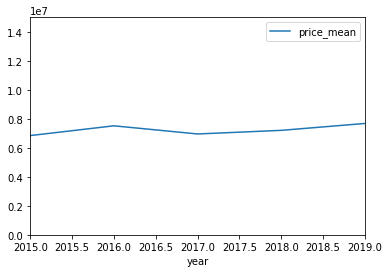

In [320]:
print(centre['last_price'].corr(centre['total_area']))
print(centre['last_price'].corr(centre['floor']))
print(centre['last_price'].corr(centre['cityCenters_nearest']))
date_centr_pivot = centre.pivot_table(index = 'year', values = 'last_price', aggfunc = ['mean'])
dcp_sort = date_centr_pivot.sort_values('year')
dcp_sort.columns = ['price_mean']
dcp_sort.plot(y='price_mean', ylim=(0, 15000000))
# естественно что стоимость зависит от общей площади (0.53)
# так же она зависит от этажа, но уже в меньшей степени (0.22)
# в пределах 3 км зависимости от расстояния нет, посути это все центр
# средняя цена квартир в центре держится на примерно одном уровне 7-8 млн


#стоимость зависит от общей площади (0.53)
#так же она зависит от этажа, но уже в меньшей степени (0.22)
#в пределах 3 км зависимости от расстояния нет, посути это все центр
#средняя цена квартир в центре держится на примерно одном уровне 7-8 млн


0.7931049626957757
0.10861265410598171
-0.28817448117582417


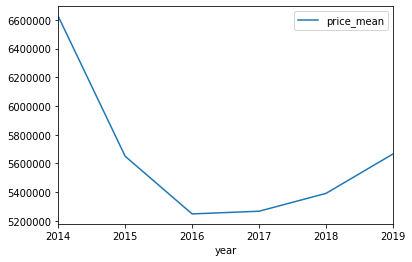

In [319]:
# те же данные в Питеру в целом
print(spb_centr['last_price'].corr(spb_centr['total_area']))
print(spb_centr['last_price'].corr(spb_centr['floor']))
print(spb_centr['last_price'].corr(spb_centr['cityCenters_nearest']))
date_spb_pivot = spb_centr.pivot_table(index = 'year', values = 'last_price', aggfunc = ['mean'])
dcp_sort_spb = date_spb_pivot.sort_values('year')
dcp_sort_spb.columns = ['price_mean']
dcp_sort_spb.plot(y='price_mean')


#зависимость от площади такая же как и в центре
#от этажа квартиры цена уже не зависит 
#и появилась зависимость от расстояния до центра
#в отличие от средней цены квартир в центре, по городу в целом мы видим провал почти на 1 млн с 14 до 16 года. В 18 году начался более увереный рост средней цены



### Шаг 5. Общий вывод

Проделав это небольшое исследование я могу сделать некоторые выводы.
Для начала посмотрим что из себя представляет основная масса квартир, проданых в регионе СПБ:
-Подавляющее число квартир из нашей базы это квартиры до 3 комнат с площадью до 100кв м с потолками до 2.8 м

Как мне кажется это типичная ситуация по России которая зародилась в советское время, когда все делали типовое. Квартир студий и квартир с свободной планировкой крайне мало (последних кстати в таблице вообще нет, если есть возможность перепланировать кв можно было бы добавить этот в пункт и в нашу базу)

В среднем квартиры в данном регионе продаются за 92 дня (медианное значение) но довольно много квартир имеют более долгий срок продажи, значение медианы с среднее отличаются на 100 дней. Обусловлено это нестандартными предложениями которые продать сложнее. Все что выше среднего времени (200дней)я считаю долгой продажей, это около 25% всех квартир.

Так же в исследовании я посмотрел влияние некоторых параметров на цену квартиры. Самая большая зависимость была от общей площади и количества комнат, и я не обнаружил зависимости от этажа и расстояния до центра, первое логично - если не брать в рассчет элитную недвижимость, где вид из окна может дописать пару лишних нулей, при покупке стандартной квартиры люди смотрят на этаж в последнюю очередь. Но почему нет зависимости от центра для меня осталось загадкой.

Далее я рассмотрел среднюю цену за квадратный метр в самых крупных городах региона. лидером как и ожидалось стал Питер, а вот Выборг незаслуженно попал на последнее место. Возможно в этом городе существуют какие то проблемы, тк сам по себе Выборг очень красивый исторический город рядом с границей, странной что там такая дешевая недвижимость.

В финале исследования я сравнил некоторые показатели квартир в центре Питербурга и в целом по городу. Мне удалось обнаружить следующие различия: 
1. Потолки в центре выше
2. Количество комнат в квартирах проданнх в центре больше
3. Общая площадь так же выше
4. У цены на квартиры в центре появляется зависимость от этажа (о чем я писал выше)

В конце я сравнил 2 графика средней цены в центре и по городу в зависимости от года. Я обнаружил что в период с 14 года по н.в. в общем по питеру был спад средней стоимости квартиры, связано это как мне кажется с обвалом рубля и экономическими санкциями повлекшими к спаду доходов. Однако в центре сиация практически не менялась даже в кризисные годы, отсюда можно сделать вывод что кризис в большей стпени влияет на не самых богатых людей





